In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',102)


In [142]:
def clean_columns (data):
    
    data = data.rename(columns={'ID':'ID',
                                'Name':'Name',
                                'Age':'Age',
                                'Nationality':'Nationality',
                                'Club':'Club',
                                'BP':'Backup Position',
                                'Position':'Position',                                
                                'Team & Contract':'Team & Contract',
                                'Height':'Height',
                                'Weight':'Weight',
                                'foot':'Dominant Foot',   
                                'Growth':'Growth',
                                'Joined':'Joined',
                                'Loan Date End Value':'Loan Date End Value',
                                'Wage':'Wage',
                                'Release Clause':'Release Clause',
                                'Contract':'Contract',
                                'Attacking':'Attacking',
                                'Crossing':'Crossing',
                                'Finishing':'Finishing',
                                'Heading Accuracy':'Heading Accuracy',
                                'Volleys Passing':'Volleys Passing',
                                'Skill':'Skill',
                                'Dribbling':'Dribbling',
                                'Curve':'Curve',
                                'FK Accuracy':'Free Kick Accuracy',
                                'Long Passing':'Long Passing',
                                'Ball Control':'Ball Control',
                                'Movement':'Movement',
                                'Acceleration':'Acceleration',
                                'Sprint Speed':'Sprint Speed',
                                'Agility':'Agility',
                                'Reactions':'Reactions',
                                'Balance':'Balance',
                                'Power':'Power',
                                'Shot Power':'Shot Power',
                                'Jumping':'Jumping',
                                'Stamina':'Stamina',
                                'Strength':'Strength',
                                'Long Shots':'Long Shots',
                                'Mentality':'Mentality',
                                'Aggression':'Aggression',
                                'Interceptions':'Interceptions',
                                'Positioning':'Positioning',
                                'Vision':'Vision',
                                'Penalties':'Penalties',
                                'Composure':'Composure',
                                'Defending':'Defending',
                                'Marking':'Marking',
                                'Standing Tackle':'Standing Tackle',
                                'Sliding Tackle':'Sliding Tackle',
                                'Goalkeeping':'Goalkeeping',
                                'GK Diving':'Goalkeeper Diving',
                                'GK Handling':'Goalkeeper Handling',
                                'GK Kicking':'Goalkeeper Kicking',
                                'GK Positioning':'Goalkeeper Positioning',
                                'GK Reflexes':'Goalkeeper Reflexes',
                                'Total Stats':'Total Stats',
                                'Base Stats':'Base Stats',
                                'W/F':'Weak Foot',
                                'SM':'Skill Moves',
                                'A/W':'Attacking Work Rate',                                
                                'D/W':'Defensive Work Rate',
                                'IR':'Internal Reputation',
                                'PAC':'Pace',
                                'SHO':'Shooting',
                                'PAS':'Passing',
                                'DRI':'Dribbling',
                                'DEF':'Defense',
                                'PHY':'Physical',
                                'Hits':'Hits',
                                'LS':'Left Striker',
                                'ST':'Striker',
                                'RS':'Right Striker',
                                'LW':'Left Wing',
                                'LF':'Left Forward',
                                'CF':'Center Forward',
                                'RF':'Right Forward',
                                'RW':'Right Wing',
                                'LAM':'Left Attacking Midfielder',
                                'CAM':'Center Attacking Midfielder',
                                'RAM':'Right Attacking Midfielder',
                                'LM':'Left Midfielder',
                                'LCM':'Left Center Midfielder',
                                'CM':'Center Midfielder',
                                'RCM':'Right Center Midfielder',
                                'RM':'Right Midfielder',
                                'LWB':'Left Wing Back',
                                'LDM':'Left Defending Midfielder',
                                'CDM':'Center Defending Midfielder',
                                'RDM':'Right Defending Midfielder',
                                'RWB':'Right Wing Back',
                                'LB':'Left Back',
                                'LCB':'Left Center Back',
                                'CB':'Center Back',
                                'RCB':'Right Center Back',
                                'RB':'Right Back',
                                'GK':'Goal-Keeper',
                                'OVA':'Overall Rating'})
    
    # Transform some categorical columns into numerical
            
    data['Internal Reputation'] = pd.to_numeric(list(map(lambda x: x.replace(' ★', ''), data['Internal Reputation'])), errors='coerce')
    data['Skill Moves'] = pd.to_numeric(list(map(lambda x: x.replace('★', ''), data['Skill Moves'])), errors='coerce')
    data['Weak Foot'] = pd.to_numeric(list(map(lambda x: x.replace(' ★', ''), data['Weak Foot'])), errors='coerce')

    def values(amount):
        amount = amount.replace('€', '')
        if amount.find('K')>0:
            return int(float(amount.replace('K', ''))*1000)
        elif amount.find('M')>0:
            return int(float(amount.replace('M', ''))*1000000)
        else:
            return int((amount))

    data['Hits'] = pd.to_numeric(list(map(values, data['Hits'])), errors='coerce')    
    data['Value'] = pd.to_numeric(list(map(values, data['Value'])), errors='coerce')
    data['Wage'] = pd.to_numeric(list(map(values, data['Wage'])), errors='coerce')
    data['Release Clause'] = pd.to_numeric(list(map(values, data['Release Clause'])), errors='coerce')

    def conv_height(x):
        x = x.split("'")
        return (int(x[0])*30.48 + int(x[1].replace('"', '')))

    data['Height'] = pd.to_numeric(list(map(conv_height, data['Height'])), errors='coerce')

    def conv_weight(x):
        x = x.split("lbs")
        x = int(x[0])*0.45359237
        return round(x,2)

    data['Weight'] = pd.to_numeric(list(map(conv_weight, data['Weight'])), errors='coerce')
              
    
    # Reworking NAN values

    # Club - use mode for NAN
    data['Club'] = data['Club'].fillna('Free Agent')
    # Attacking Work Rate - use mode for NAN
    data['Attacking Work Rate'] = data['Attacking Work Rate'].fillna('Medium')
    # Defensive Work Rate - use mode for NAN
    data['Defensive Work Rate'] = data['Defensive Work Rate'].fillna('Medium')

    # Position - substitute NAN for 'U' (for Unknown)
    data['Position'] = data['Position'].fillna('U')

    # Joined - turn into "Year Joined" and drop OG - use mean for NAN
    data[['Joined','Year Joined']] = data['Joined'].str.split(',',expand=True)
    data['Year Joined'] = pd.to_numeric(data['Year Joined'])
    data = data.drop(['Joined'], axis=1)
    mean_yearjoin = data['Year Joined'].mean()
    data['Year Joined'] = data['Year Joined'].fillna(mean_yearjoin)
    data['Year Joined'] = data['Year Joined'].astype(int)

    # Volleys - use mean for NAN
    mean_volleys = data['Volleys'].mean()
    data['Volleys'] = data['Volleys'].fillna(mean_volleys)
    # Curve - use mean for NAN
    mean_curve = data['Curve'].mean()
    data['Curve'] = data['Curve'].fillna(mean_curve)
    # Agility - use mean for NAN
    mean_agility = data['Agility'].mean()
    data['Agility'] = data['Agility'].fillna(mean_agility)
    # Balance - use mean for NAN
    mean_balance = data['Balance'].mean()
    data['Balance'] = data['Balance'].fillna(mean_balance)
    # Jumping - use mean for NAN
    mean_jumping = data['Jumping'].mean()
    data['Jumping'] = data['Jumping'].fillna(mean_jumping)
    # Interceptions - use mean for NAN
    mean_interceptions = data['Interceptions'].mean()
    data['Interceptions'] = data['Interceptions'].fillna(mean_interceptions)
    # Positioning - use mean for NAN
    mean_positioning = data['Positioning'].mean()
    data['Positioning'] = data['Positioning'].fillna(mean_positioning)
    # Vision - use mean for NAN
    mean_vision = data['Vision'].mean()
    data['Vision'] = data['Vision'].fillna(mean_vision)
    # Composure - use mean for NAN
    mean_composure = data['Composure'].mean()
    data['Composure'] = data['Composure'].fillna(mean_composure)
    # Sliding Tackle - use mean for NAN
    mean_slidingt = data['Sliding Tackle'].mean()
    data['Sliding Tackle'] = data['Sliding Tackle'].fillna(mean_slidingt)
    # Hits - use mean for NAN
    mean_hits = data['Hits'].mean()
    data['Hits'] = data['Hits'].fillna(mean_hits)
  
    
    # Numerical variables
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numerical = data.select_dtypes(include=numerics)
    # Drop columns that dont affect the Score
    numerical = numerical.drop(['ID', 'Age', 'Growth'], axis=1)
    # Drop columns that are a Summation of other columns
    numerical = numerical.drop(['Attacking', 'Skill', 'Movement', 'Power', 'Mentality', 'Defending', 'Goalkeeping'], axis=1)
    numerical = numerical.drop(['Pace', 'Shooting', 'Passing', 'Dribbling', 'Defense', 'Physical', 'Total Stats', 'Base Stats'], axis=1)
    
    # Categorical variables
    categorical = data.select_dtypes(include=object)
    # Drop columns that no affect the Score
    categorical = categorical.drop(['Name', 'Team & Contract', 'Contract'], axis=1)

    position = categorical[['Left Striker', 'Striker', 'Right Striker', 'Left Wing', 'Left Forward', 'Center Forward', 'Right Forward', 'Right Wing', 'Left Attacking Midfielder', 'Center Attacking Midfielder', 'Right Attacking Midfielder', 'Left Midfielder', 'Left Center Midfielder', 'Center Midfielder', 'Right Center Midfielder', 'Right Midfielder', 'Left Wing Back', 'Left Defending Midfielder', 'Center Defending Midfielder', 'Right Defending Midfielder', 'Right Wing Back', 'Left Back', 'Left Center Back', 'Center Back', 'Right Center Back', 'Right Back', 'Goal-Keeper']]
    for x in position.columns:
        categorical[['Actual '+x,'Potential '+x]] = categorical[x].str.split('+',expand=True)
        

    categorical = categorical.drop(['Loan Date End', 'Left Striker', 'Striker', 'Right Striker', 'Left Wing', 'Left Forward', 'Center Forward', 'Right Forward', 'Right Wing', 'Left Attacking Midfielder', 'Center Attacking Midfielder', 'Right Attacking Midfielder', 'Left Midfielder', 'Left Center Midfielder', 'Center Midfielder', 'Right Center Midfielder', 'Right Midfielder', 'Left Wing Back', 'Left Defending Midfielder', 'Center Defending Midfielder', 'Right Defending Midfielder', 'Right Wing Back', 'Left Back', 'Left Center Back', 'Center Back', 'Right Center Back', 'Right Back', 'Goal-Keeper',  'Potential Left Striker', 'Potential Striker', 'Potential Right Striker', 'Potential Left Wing', 'Potential Left Forward', 'Potential Center Forward', 'Potential Right Forward', 'Potential Right Wing', 'Potential Left Attacking Midfielder', 'Potential Center Attacking Midfielder', 'Potential Right Attacking Midfielder', 'Potential Left Midfielder', 'Potential Left Center Midfielder', 'Potential Center Midfielder', 'Potential Right Center Midfielder', 'Potential Right Midfielder', 'Potential Left Wing Back', 'Potential Left Defending Midfielder', 'Potential Center Defending Midfielder', 'Potential Right Defending Midfielder', 'Potential Right Wing Back', 'Potential Left Back', 'Potential Left Center Back', 'Potential Center Back', 'Potential Right Center Back', 'Potential Right Back', 'Potential Goal-Keeper'], axis=1)

    return (numerical, categorical)

In [143]:
data = pd.read_csv('fifa21_train.csv')

numerical, categorical = clean_columns (data)

display(numerical)
display(categorical)


,Height,Weight,Value,Wage,Release Clause,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Curve,Free Kick Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,Goalkeeper Kicking,Goalkeeper Positioning,Goalkeeper Reflexes,Weak Foot,Skill Moves,Internal Reputation,Hits,Overall Rating,Year Joined
0,161.40,73.03,525000,4000,801000,54,47,43,70,44.000000,44.000000,55,63,63,64,73,61.000000,66,82.000000,62,73.000000,71,55,45,54,52.0,62.0,68.000000,54,54.000000,49,56,43.000000,7,12,14,9,6,4,2,1,3,64,2015
1,182.88,72.12,8500000,23000,0,66,79,76,68,76.000000,78.000000,72,63,79,83,83,88.000000,75,75.000000,74,81.000000,75,74,68,54,33.0,78.0,72.000000,76,70.000000,35,20,22.000000,11,7,14,7,16,3,4,2,44,77,2015
2,156.40,60.78,9000000,49000,15300000,73,76,34,78,75.000000,89.000000,91,74,85,84,76,93.000000,78,93.000000,79,34.000000,75,42,78,75,26.0,80.0,78.000000,73,82.000000,23,29,28.000000,6,3,6,3,3,4,4,2,73,80,2019
3,162.40,68.95,275000,4000,694000,44,42,58,62,36.000000,41.000000,46,57,61,54,59,59.000000,55,55.000000,57,60.000000,64,58,38,61,57.0,31.0,54.000000,54,48.000000,55,58,55.000000,8,9,6,7,12,2,2,1,7,59,2016
4,163.40,68.04,725000,2000,1400000,49,37,61,68,34.000000,44.000000,45,61,66,66,66,61.000000,62,69.000000,61,34.000000,81,61,43,66,60.0,55.0,64.000000,49,58.000000,58,61,66.000000,8,9,15,5,15,2,3,1,4,65,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,183.88,76.20,625000,3000,891000,62,24,51,59,28.000000,49.000000,29,54,59,78,73,68.000000,53,61.000000,31,72.000000,77,68,25,63,59.0,51.0,54.000000,39,46.000000,59,64,61.000000,13,14,14,6,14,3,2,1,3,65,2018
11697,183.88,78.93,1600000,4000,2900000,12,14,13,29,16.000000,15.000000,19,27,18,40,40,38.000000,65,54.000000,50,59.000000,29,64,15,30,22.0,15.0,15.000000,19,56.000000,12,16,13.000000,72,67,66,70,72,2,1,1,3,70,2019
11698,158.40,64.86,1100000,2000,1700000,64,66,51,64,41.000000,57.000000,38,58,67,77,76,86.000000,62,87.000000,61,71.000000,64,37,45,27,25.0,66.0,58.000000,65,58.000000,37,12,13.000000,13,10,11,7,16,3,3,1,6,67,2019
11699,184.88,81.19,0,0,0,64,66,51,73,45.067324,49.617839,63,72,75,71,72,64.582075,55,64.709348,61,65.036621,71,64,62,64,61.0,63.0,55.439194,53,59.947732,55,58,45.827702,9,24,72,24,24,3,1,3,3,68,2017


,Nationality,Club,Backup Position,Position,Dominant Foot,Attacking Work Rate,Defensive Work Rate,Actual Left Striker,Actual Striker,Actual Right Striker,Actual Left Wing,Actual Left Forward,Actual Center Forward,Actual Right Forward,Actual Right Wing,Actual Left Attacking Midfielder,Actual Center Attacking Midfielder,Actual Right Attacking Midfielder,Actual Left Midfielder,Actual Left Center Midfielder,Actual Center Midfielder,Actual Right Center Midfielder,Actual Right Midfielder,Actual Left Wing Back,Actual Left Defending Midfielder,Actual Center Defending Midfielder,Actual Right Defending Midfielder,Actual Right Wing Back,Actual Left Back,Actual Left Center Back,Actual Center Back,Actual Right Center Back,Actual Right Back,Actual Goal-Keeper
0,Switzerland,FC Lausanne-Sport,CM,CM CDM,Right,High,Medium,58,58,58,61,62,62,62,61,63,63,63,63,63,63,63,63,59,59,59,59,59,58,54,54,54,58,15
1,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,Right,High,Low,77,77,77,77,77,77,77,77,76,76,76,76,68,68,68,76,57,53,53,53,57,53,48,48,48,53,18
2,Italy,Al Hilal,CAM,CAM CF,Right,High,Medium,73,73,73,80,79,79,79,80,80,80,80,79,74,74,74,79,59,56,56,56,59,53,41,41,41,53,12
3,Wales,Swansea City,CDM,CDM CM,Right,Medium,Medium,50,50,50,51,51,51,51,51,53,53,53,53,56,56,56,53,56,58,58,58,56,57,58,58,58,57,14
4,France,US Orléans Loiret Football,CDM,CDM CM,Right,Low,Medium,56,56,56,59,59,59,59,59,61,61,61,62,63,63,63,62,64,64,64,64,64,63,61,61,61,63,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,Iceland,Jagiellonia Białystok,LB,LB,Left,Medium,Medium,48,48,48,55,52,52,52,55,54,54,54,58,56,56,56,58,63,60,60,60,63,63,61,61,61,63,16
11697,France,ESTAC Troyes,GK,GK,Right,Medium,Medium,28,28,28,24,26,26,26,24,24,24,24,25,25,25,25,25,25,26,26,26,25,24,26,26,26,24,69
11698,Chile,CD Antofagasta,RM,LM CAM RM,Right,High,Medium,62,62,62,67,65,65,65,67,65,65,65,66,58,58,58,66,49,44,44,44,49,45,35,35,35,45,17
11699,Brazil,Barnsley,CM,U,Right,Medium,Medium,68,68,68,71,68,68,68,71,72,72,72,71,71,71,71,71,66,68,68,68,66,64,60,60,60,64,25


In [144]:
#Normalization

def normalized_columns (numerical, transformer=None):
    
    numerical_norm = numerical.drop(['Overall Rating'], axis=1)

    # Normalizing using MinMaxScaler
    if (transformer):
#         transformer = MinMaxScaler().fit(numerical_norm)
        x_normalized = transformer.transform(numerical_norm)
        # print(x_normalized.shape)
        x_normalized=pd.DataFrame(x_normalized, columns=numerical_norm.columns)
    else:
        transformer = MinMaxScaler().fit(numerical_norm)
        x_normalized = transformer.transform(numerical_norm)
        # print(x_normalized.shape)
        x_normalized=pd.DataFrame(x_normalized, columns=numerical_norm.columns)

    return (x_normalized, transformer)


In [145]:
# Encoding Categorical Data.

def encoded_columns (categorical, transformer=None):

    #label encoder
    if (transformer):
        label_encoded=categorical.apply(transformer) 
    else:
        transformer = LabelEncoder().fit_transform
        label_encoded=categorical.apply(LabelEncoder().fit_transform) 
    return (label_encoded, transformer)


In [146]:
# X-y Split

x_normalized, num_trans = normalized_columns (numerical)

label_encoded, cat_trans = encoded_columns (categorical)

X = pd.concat([x_normalized, label_encoded], axis=1)

y = numerical['Overall Rating']


In [147]:
# Splitting into train set and test set.
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9360, 77)
(2341, 77)
(9360,)
(2341,)


In [148]:
# Training the model

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

# Preliminary score

from sklearn.metrics import r2_score

predictions = lm.predict(X_train)
r2 = r2_score(y_train, predictions)

# Testing the model

predictions = lm.predict(X_test)

In [149]:
# Model Validation

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import linear_model
import math


print('R2 Train: ', round(r2,3))
r2 = r2_score(y_test, predictions)

print('<-- Test Metrics -->')
print('R2 Test : ', round(r2,3))

mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error : ', round(mse, 3))

rmse = math.sqrt(mse)
print('Mean Error: ', round(rmse, 3))

mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error: ', round(mae,3))

R2 Train:  0.893
<-- Test Metrics -->
R2 Test :  0.89
Mean Squared Error :  5.226
Mean Error:  2.286
Mean Absolute Error:  1.773


In [150]:
# Validation File

data = pd.read_csv('fifa21_validate.csv')
numerical, categorical = clean_columns (data)
x_normalized, num_trans = normalized_columns (numerical, num_trans)
label_encoded, cat_trans = encoded_columns (categorical, cat_trans)
X = pd.concat([x_normalized, label_encoded], axis=1)
y = numerical['Overall Rating']

predictions = lm.predict(X)
print('<-- Validation File Metrics -->')
print('R2: ', round(r2_score(y, predictions),3))
mse = mean_squared_error(y, predictions)
print('Mean Squared Error : ', round(mse, 3))
rmse = math.sqrt(mse)
print('Mean Error: ', round(rmse, 3))
mae = mean_absolute_error(y, predictions)
print('Mean Absolute Error: ', round(mae,3))


<-- Validation File Metrics -->
R2:  0.887
Mean Squared Error :  5.176
Mean Error:  2.275
Mean Absolute Error:  1.772


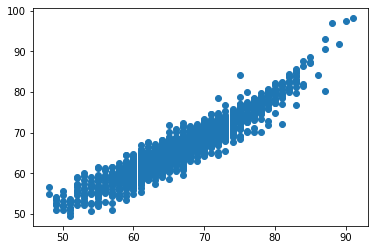

In [153]:
plt.scatter(y, predictions)
plt.show()